## NonLinear Beam Equation
\begin{align}
\frac{\partial^{4}w}{\partial x^4} + P\int_{0}^{L}\frac{\partial^{2}w}{\partial x^2} - \frac{\partial^{2}w}{\partial x^2}\int_{0}^{L} \left( \frac{\partial w}{\partial x} \right)^2 dx = 0,
\end{align}

\begin{align}
w(0) = w^{'}(0)=w(L) = w^{'}(L)= 0.
\end{align}

Here, $w$ is vertical deflection, $f$ is uniform distributive load and $P$ axial load.


#### Weak Form

By introducing the linearized moments $\sigma = w^{"}$, and $\mu = \int_{0}^{L} \left( \frac{\partial w}{\partial x} \right)^2 dx$, find $(w,\sigma,\mu) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L)) \times  \mathbb{R} $, for all $(v,\tau,\lambda) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L))\times  \mathbb{R}$

\begin{align}
\int_{0}^{L}\sigma \tau dx - P\int_{0}^{L}w^{'} v^{'}dx + \int_{0}^{L}w^{'} \tau^{'}dx + \int_{0}^{L}\sigma^{'} v^{'}dx + \frac{1}{2}\mu\int_{0}^{L}w^{'} v^{'}dx + \int_{0}^{L}\mu \lambda dx - \int_{0}^{L}w^{'2}\lambda dx= 0,
\end{align}

In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

(-10, 10)

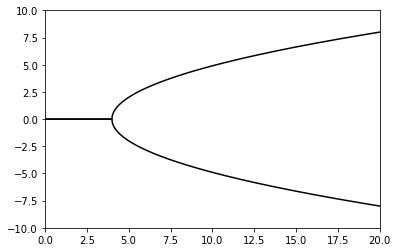

In [2]:
static_deflection = 0.5
x = np.arange(0,20,0.01)
axial_load = x*pi**2
lambda_1 = 2*pi
c_1 = 2*np.emath.sqrt((axial_load)/(lambda_1**2)-1)
exact_solution_1 = c_1*(1 - cos(lambda_1*static_deflection))
exact_solution_2 = -c_1*(1 - cos(lambda_1*static_deflection))
plt.plot(x,exact_solution_1.real,color='black',label='Exact',linestyle='-')
plt.plot(x,exact_solution_2.real,color='black',linestyle='-')
plt.xlim([0, 20])
plt.ylim([-10, 10])

In [3]:
mesh = Make1DMesh(200, mapping=None, periodic=False)

In [4]:
deflection_above = []
deflection_below = []

In [5]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 403


In [6]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

In [7]:
for i in range(len(axial_load)):
    a = BilinearForm(fesm)
    a += (grad(sigma)*grad(v) - axial_load[i]*grad(w)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda)*dx
    gfsol = GridFunction(fesm)
    gfsol.components[0].Set(exact_solution_1.real[i])
#     gfsol.components[0].Set(1)
    solvers.Newton(a,gfsol,inverse="sparsecholesky")
    gfw, gfsigma, gfmu = gfsol.components
    index = int((len(gfw.vec)+1)/2)
    print(gfw.vec[index])
    deflection_above.append(gfw.vec[index])

Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0


err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newto

err =  1.800963864317012e-13
1.6124515496597105
Newton iteration  0
err =  2.0989614092450707e-13
1.6248076809271919
Newton iteration  0
err =  1.9656288924904627e-13
1.6370705543744906
Newton iteration  0
err =  8.166139004014016e-14
1.649242250247064
Newton iteration  0
err =  2.1675106728718038e-13
1.6613247725836144
Newton iteration  0
err =  1.2765791892737677e-13
1.673320053068152
Newton iteration  0
err =  1.7075428336975266e-13
1.6852299546352718
Newton iteration  0
err =  2.808762941712411e-13
1.697056274847714
Newton iteration  0
err =  1.6419418015360572e-13
1.7088007490635073
Newton iteration  0
err =  1.7792791291449525e-13
1.7204650534085248
Newton iteration  0
err =  2.7814599715427523e-13
1.732050807568878
Newton iteration  0
err =  1.6004057135681648e-13
1.7435595774162698
Newton iteration  0
err =  1.6842209880523603e-13
1.754992877478426
Newton iteration  0
err =  2.4995467997906853e-13
1.7663521732655685
Newton iteration  0
err =  2.784972561692969e-13
1.77763888346

err =  4.445379582269388e-13
2.973213749463701
Newton iteration  0
err =  3.9499874216224127e-13
2.979932885150268
Newton iteration  0
err =  4.1608845582248617e-13
2.9866369046136154
Newton iteration  0
err =  3.677099451335279e-13
2.9933259094191524
Newton iteration  0
err =  3.2802958150965684e-13
3.0000000000000018
Newton iteration  0
err =  5.107249353985358e-13
3.0066592756745774
Newton iteration  0
err =  4.687290583951137e-13
3.0133038346638727
Newton iteration  0
err =  6.88819871651793e-13
3.019933774108299
Newton iteration  0
err =  5.447629938714307e-13
3.0265491900843102
Newton iteration  0
err =  5.633917356875188e-13
3.033150177620619
Newton iteration  0
err =  4.438033462572764e-13
3.039736830714134
Newton iteration  0
err =  3.4712638900541534e-13
3.046309242345562
Newton iteration  0
err =  3.1765726151520535e-13
3.0528675044947495
Newton iteration  0
err =  4.2654382730354377e-13
3.0594117081556695
Newton iteration  0
err =  3.8679354789810785e-13
3.0659419433511768


err =  5.046930719966858e-13
3.836665218650178
Newton iteration  0
err =  3.6626510921629494e-13
3.8418745424597107
Newton iteration  0
err =  4.1455694039644713e-13
3.8470768123342673
Newton iteration  0
err =  3.0561516740073534e-13
3.852272056851645
Newton iteration  0
err =  7.843452997700653e-13
3.8574603043971813
Newton iteration  0
err =  2.525977721512463e-13
3.8626415831655923
Newton iteration  0
err =  5.874116484645486e-13
3.867815921162742
Newton iteration  0
err =  5.754562428752074e-13
3.872983346207416
Newton iteration  0
err =  4.041012978229616e-13
3.878143885933063
Newton iteration  0
err =  7.44928051405578e-13
3.8832975677895174
Newton iteration  0
err =  5.175204516811091e-13
3.888444419044713
Newton iteration  0
err =  6.06252601265983e-13
3.893584466786356
Newton iteration  0
err =  3.154331699979292e-13
3.8987177379235853
Newton iteration  0
err =  5.578606659562802e-13
3.90384425918863
Newton iteration  0
err =  3.6586841373818343e-13
3.908964057138412
Newton i

err =  9.043922164526153e-13
4.543126676640218
Newton iteration  0
err =  9.381656905419548e-13
4.5475268003608305
Newton iteration  0
err =  4.839454350114311e-13
4.551922670696417
Newton iteration  0
err =  4.330896511001791e-13
4.556314299957807
Newton iteration  0
err =  8.208975878032022e-13
4.560701700396553
Newton iteration  0
err =  1.2238820882308714e-12
4.56508488420533
Newton iteration  0
err =  7.64420786043001e-14
4.5694638635183455
Newton iteration  0
err =  1.0848033157436305e-12
4.573838650411709
Newton iteration  0
err =  1.0469067119884833e-12
4.578209256903837
Newton iteration  0
err =  1.2375545445715686e-12
4.582575694955839
Newton iteration  0
err =  9.53619784771146e-13
4.586937976471888
Newton iteration  0
err =  6.088144097779591e-13
4.591296113299597
Newton iteration  0
err =  9.761655176855253e-13
4.5956501172304245
Newton iteration  0
err =  1.2022292366968353e-12
4.600000000000001
Newton iteration  0
err =  3.4355879149393547e-13
4.604345773288535
Newton it

Newton iteration  0
err =  5.460285487720161e-13
5.149757275833493
Newton iteration  0
err =  1.2544888794515159e-12
5.15363949069005
Newton iteration  0
err =  6.795086119681412e-13
5.15751878329105
Newton iteration  0
err =  9.181021339223876e-13
5.1613951602255765
Newton iteration  0
err =  4.3632847659043365e-13
5.1652686280579845
Newton iteration  0
err =  1.0871782569182309e-12
5.1691391933280375
Newton iteration  0
err =  4.320596880008251e-13
5.173006862551023
Newton iteration  0
err =  5.699709131840972e-13
5.1768716422179155
Newton iteration  0
err =  5.220714741229526e-13
5.180733538795446
Newton iteration  0
err =  1.0029956045728434e-12
5.184592558726295
Newton iteration  0
err =  7.014738715245557e-13
5.1884487084291395
Newton iteration  0
err =  3.978449400973566e-13
5.192301994298863
Newton iteration  0
err =  5.178143241854361e-13
5.196152422706635
Newton iteration  0
err =  1.1538273605486929e-12
5.199999999999999
Newton iteration  0
err =  7.214740633215208e-13
5.203

err =  1.091695836787839e-12
5.649778756730215
Newton iteration  0
err =  1.5247247312208995e-12
5.653317610041027
Newton iteration  0
err =  1.2109953159683165e-12
5.656854249492382
Newton iteration  0
err =  1.3305569065622766e-12
5.660388679233962
Newton iteration  0
err =  1.5024150053714438e-12
5.663920903402513
Newton iteration  0
err =  1.0341653240974641e-12
5.667450926121901
Newton iteration  0
err =  1.149189380176523e-12
5.670978751503126
Newton iteration  0
err =  8.589624944103959e-13
5.674504383644443
Newton iteration  0
err =  1.0520883213785656e-12
5.678027826631356
Newton iteration  0
err =  8.212419524372373e-13
5.6815490845367185
Newton iteration  0
err =  7.850973689729619e-13
5.685068161420757
Newton iteration  0
err =  5.546971612308266e-13
5.688585061331156
Newton iteration  0
err =  1.2094892217283303e-12
5.692099788303079
Newton iteration  0
err =  1.2795580414010019e-12
5.695612346359255
Newton iteration  0
err =  1.158275381306067e-12
5.699122739509999
Newton

err =  1.6302498096804023e-12
6.151422599691879
Newton iteration  0
err =  1.064819551325652e-12
6.154673021371646
Newton iteration  0
err =  1.1428086003886754e-12
6.1579217273362605
Newton iteration  0
err =  1.5184441759593642e-12
6.161168720299744
Newton iteration  0
err =  1.953923041089424e-12
6.164414002968977
Newton iteration  0
err =  7.420517435852417e-13
6.167657578043713
Newton iteration  0
err =  1.3132530101770165e-12
6.170899448216608
Newton iteration  0
err =  1.4057938799267706e-12
6.174139616173246
Newton iteration  0
err =  1.5207063803827926e-12
6.177378084592202
Newton iteration  0
err =  1.7600720594005675e-12
6.1806148561449765
Newton iteration  0
err =  1.3412402365004439e-12
6.183849933496123
Newton iteration  0
err =  6.955905383734005e-13
6.187083319303206
Newton iteration  0
err =  1.4237758488542608e-12
6.1903150162168625
Newton iteration  0
err =  1.7151729782469446e-12
6.19354502688081
Newton iteration  0
err =  1.4655527418433872e-12
6.196773353931863
Ne

Newton iteration  0
err =  1.5376275543180149e-12
6.618156843109712
Newton iteration  0
err =  1.5335255121224014e-12
6.6211781428987395
Newton iteration  0
err =  1.1663115217351793e-12
6.624198064671682
Newton iteration  0
err =  1.3530629547195054e-12
6.627216610312354
Newton iteration  0
err =  1.3047599235267967e-12
6.630233781700313
Newton iteration  0
err =  6.776591544027793e-13
6.6332495807108
Newton iteration  0
err =  1.1576100874999118e-12
6.636264009214824
Newton iteration  0
err =  1.3262842381718695e-12
6.639277069079127
Newton iteration  0
err =  1.068687519965642e-12
6.64228876216625
Newton iteration  0
err =  1.4365745624321532e-12
6.645299090334458
Newton iteration  0
err =  7.514568552752828e-13
6.64830805543786
Newton iteration  0
err =  1.7521554316645575e-12
6.651315659326354
Newton iteration  0
err =  1.1025382531363729e-12
6.654321903845653
Newton iteration  0
err =  1.8166893757930918e-12
6.657326790837291
Newton iteration  0
err =  3.3950567441470147e-13
6.66

Newton iteration  0
err =  1.3553590912068424e-12
7.042726744663605
Newton iteration  0
err =  1.565235371525202e-12
7.0455659815234135
Newton iteration  0
err =  1.8007410284628604e-12
7.048404074682438
Newton iteration  0
err =  1.920592261972313e-12
7.05124102552168
Newton iteration  0
err =  1.2780882780057442e-12
7.054076835419357
Newton iteration  0
err =  1.044110496317473e-12
7.05691150575094
Newton iteration  0
err =  1.1408519113104895e-12
7.0597450378891216
Newton iteration  0
err =  1.5410674317740942e-12
7.062577433203832
Newton iteration  0
err =  1.6255950583582122e-12
7.065408693062274
Newton iteration  0
err =  8.45539875797257e-13
7.068238818828918
Newton iteration  0
err =  7.079200113252339e-13
7.071067811865473
Newton iteration  0
err =  1.534526752267499e-12
7.073895673530954
Newton iteration  0
err =  1.422331070330022e-12
7.076722405181653
Newton iteration  0
err =  2.2946100147213193e-12
7.079548008171139
Newton iteration  0
err =  1.2827502432097764e-12
7.0823

err =  2.76907595266078e-12
7.453858061433688
Newton iteration  0
err =  2.317652464172014e-12
7.456540752922898
Newton iteration  0
err =  1.2278380589017466e-12
7.459222479588607
Newton iteration  0
err =  2.2628911342623094e-12
7.461903242471053
Newton iteration  0
err =  1.4963335529054026e-12
7.4645830426086075
Newton iteration  0
err =  1.9741663785442825e-12
7.467261881037793
Newton iteration  0
err =  1.228331285017753e-12
7.46993975879324
Newton iteration  0
err =  1.6288814797413747e-12
7.472616676907757
Newton iteration  0
err =  1.3872413774346402e-12
7.475292636412301
Newton iteration  0
err =  2.4091034298684626e-12
7.4779676383359694
Newton iteration  0
err =  1.5887250967014964e-12
7.4806416837060175
Newton iteration  0
err =  9.038110939295348e-13
7.483314773547885
Newton iteration  0
err =  2.3550857430184007e-12
7.485986908885162
Newton iteration  0
err =  1.9166457203848987e-12
7.488658090739623
Newton iteration  0
err =  1.9654035514393004e-12
7.491328320131216
New

Newton iteration  0
err =  1.1461163058142013e-12
7.851114570556208
Newton iteration  0
err =  1.8887127755994163e-12
7.853661566428745
Newton iteration  0
err =  1.8891989933383525e-12
7.856207736560937
Newton iteration  0
err =  1.716617702127472e-12
7.858753081755404
Newton iteration  0
err =  1.9025662944925325e-12
7.861297602813421
Newton iteration  0
err =  1.859226642942695e-12
7.863841300534994
Newton iteration  0
err =  1.851246240775855e-12
7.866384175718849
Newton iteration  0
err =  1.8110961235588157e-12
7.868926229162401
Newton iteration  0
err =  1.217065279742413e-12
7.871467461661767
Newton iteration  0
err =  1.5537572226089602e-12
7.874007874011816
Newton iteration  0
err =  9.723300705500539e-13
7.876547467006087
Newton iteration  0
err =  1.5928544288982675e-12
7.879086241436881
Newton iteration  0
err =  1.6844698300175335e-12
7.881624198095211
Newton iteration  0
err =  1.9389596974552954e-12
7.884161337770813
Newton iteration  0
err =  2.6395178297837313e-12
7.8

In [8]:
for i in range(len(axial_load)):
    a = BilinearForm(fesm)
    a += (grad(sigma)*grad(v) - axial_load[i]*grad(w)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda)*dx
    gfsol = GridFunction(fesm)
    gfsol.components[0].Set(exact_solution_2.real[i])
#     gfsol.components[0].Set(1)
    solvers.Newton(a,gfsol,inverse="sparsecholesky")
    gfw, gfsigma, gfmu = gfsol.components
    index = int((len(gfw.vec)+1)/2)
    print(gfw.vec[index])
    deflection_below.append(gfw.vec[index])

Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0


err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newton iteration  0
err =  0.0
0.0
Newto

err =  1.7728843686060004e-13
-1.385640646055102
Newton iteration  0
err =  2.666136550751071e-13
-1.4000000000000012
Newton iteration  0
err =  1.8536374927743317e-13
-1.4142135623730956
Newton iteration  0
err =  1.2858784061763956e-13
-1.4282856857085688
Newton iteration  0
err =  2.3399661976898825e-13
-1.4422205101855958
Newton iteration  0
err =  1.8800863789220376e-13
-1.456021977856105
Newton iteration  0
err =  1.6040836317097755e-13
-1.469693845669908
Newton iteration  0
err =  2.015135815800331e-13
-1.4832396974191322
Newton iteration  0
err =  1.6133289803904952e-13
-1.4966629547095756
Newton iteration  0
err =  1.321664439246857e-13
-1.5099668870541498
Newton iteration  0
err =  1.4773502455674952e-13
-1.523154621172781
Newton iteration  0
err =  2.3113286259124173e-13
-1.536229149573721
Newton iteration  0
err =  1.7339967740642187e-13
-1.5491933384829675
Newton iteration  0
err =  1.9918112083207586e-13
-1.5620499351813313
Newton iteration  0
err =  2.1023822373391534e-1

err =  4.0771294215784935e-13
-2.6229754097208
Newton iteration  0
err =  2.835526514858559e-13
-2.630589287593181
Newton iteration  0
err =  4.2492241147198545e-13
-2.638181191654586
Newton iteration  0
err =  4.629850023557939e-13
-2.645751311064592
Newton iteration  0
err =  4.0668791632288963e-13
-2.6532998322843184
Newton iteration  0
err =  4.202943836154027e-13
-2.660826939130014
Newton iteration  0
err =  4.5392156174496206e-13
-2.6683328128252652
Newton iteration  0
err =  3.633748050655812e-13
-2.675817632051928
Newton iteration  0
err =  4.2126628327992667e-13
-2.683281572999749
Newton iteration  0
err =  3.5481257733795613e-13
-2.6907248094147422
Newton iteration  0
err =  6.460800529864926e-13
-2.6981475126464076
Newton iteration  0
err =  3.8566420693918786e-13
-2.705549851693737
Newton iteration  0
err =  2.8555419358419257e-13
-2.7129319932501086
Newton iteration  0
err =  4.903839300684797e-13
-2.7202941017470903
Newton iteration  0
err =  6.248122442195171e-13
-2.7276

err =  5.340663900106558e-13
-3.4985711369071817
Newton iteration  0
err =  6.188894151189326e-13
-3.5042830935870475
Newton iteration  0
err =  2.2280671226542907e-13
-3.509985754956849
Newton iteration  0
err =  5.26684700957798e-13
-3.5156791662493907
Newton iteration  0
err =  6.050288340436292e-13
-3.5213633723318005
Newton iteration  0
err =  4.2022591788525606e-13
-3.5270384177096785
Newton iteration  0
err =  5.341814940738277e-13
-3.532704346531137
Newton iteration  0
err =  4.901786174774101e-13
-3.5383612025908278
Newton iteration  0
err =  5.071039295033745e-13
-3.5440090293338717
Newton iteration  0
err =  7.361596926415825e-13
-3.549647869859768
Newton iteration  0
err =  6.810923990694575e-13
-3.5552777669262343
Newton iteration  0
err =  5.691565931441589e-13
-3.5608987629529714
Newton iteration  0
err =  4.968003268250697e-13
-3.5665109000254
Newton iteration  0
err =  7.068140662912584e-13
-3.5721142198983498
Newton iteration  0
err =  6.941989197135461e-13
-3.5777087

Newton iteration  0
err =  1.141950652598917e-12
-4.252058325093858
Newton iteration  0
err =  1.3049302847225625e-12
-4.25675933075855
Newton iteration  0
err =  6.584241049669561e-13
-4.261455150532503
Newton iteration  0
err =  4.0447226406854506e-13
-4.266145801540309
Newton iteration  0
err =  4.427062134883913e-13
-4.270831300812523
Newton iteration  0
err =  7.645583520009176e-13
-4.275511665286391
Newton iteration  0
err =  8.783921047986018e-13
-4.280186911806538
Newton iteration  0
err =  8.438604664198859e-13
-4.28485705712571
Newton iteration  0
err =  3.303673347680147e-13
-4.289522117905444
Newton iteration  0
err =  2.772749622753696e-13
-4.294182110716777
Newton iteration  0
err =  6.023801634595138e-13
-4.298837052040935
Newton iteration  0
err =  4.449873384022426e-13
-4.303486958270004
Newton iteration  0
err =  1.033889733175501e-12
-4.308131845707604
Newton iteration  0
err =  2.1008648194313553e-13
-4.312771730569565
Newton iteration  0
err =  6.688510497727723e-1

err =  6.448920894406085e-13
-4.874423042781577
Newton iteration  0
err =  3.1865195917878793e-13
-4.878524367060187
Newton iteration  0
err =  0.0
-4.882622246293481
Newton iteration  0
err =  1.2477767171063462e-12
-4.886716689148247
Newton iteration  0
err =  1.0990801275081987e-12
-4.890807704254992
Newton iteration  0
err =  4.63898522703872e-13
-4.894895300208168
Newton iteration  0
err =  3.562622901762499e-13
-4.898979485566357
Newton iteration  0
err =  9.717308056340808e-13
-4.903060268852505
Newton iteration  0
err =  9.585618768773451e-13
-4.907137658554119
Newton iteration  0
err =  7.586760629344331e-13
-4.91121166312347
Newton iteration  0
err =  5.657026329541216e-13
-4.915282290977804
Newton iteration  0
err =  9.992557770056312e-13
-4.919349550499538
Newton iteration  0
err =  9.203033804453475e-13
-4.923413450036468
Newton iteration  0
err =  7.388449012891378e-13
-4.927473997901967
Newton iteration  0
err =  8.592683860987389e-13
-4.9315312023751785
Newton iteration

err =  1.5880947809467891e-12
-5.429548784199291
Newton iteration  0
err =  1.1553370580550997e-12
-5.4332310828824495
Newton iteration  0
err =  1.1558445955555671e-12
-5.436910887627275
Newton iteration  0
err =  1.6176675134649448e-12
-5.440588203494177
Newton iteration  0
err =  1.1027898802453059e-12
-5.444263035526484
Newton iteration  0
err =  4.514045634783988e-13
-5.447935388750495
Newton iteration  0
err =  6.830589143101935e-13
-5.451605268175608
Newton iteration  0
err =  1.7464193385478457e-12
-5.455272678794341
Newton iteration  0
err =  6.984142602730872e-13
-5.458937625582476
Newton iteration  0
err =  1.0941215543860885e-12
-5.462600113499063
Newton iteration  0
err =  6.131149504455551e-13
-5.466260147486577
Newton iteration  0
err =  1.4459307049372273e-12
-5.469917732470935
Newton iteration  0
err =  1.3686443636564058e-12
-5.473572873361602
Newton iteration  0
err =  7.061058329808158e-13
-5.477225575051661
Newton iteration  0
err =  1.2592431547250732e-12
-5.48087

err =  1.5729220126115253e-12
-5.919459434779496
Newton iteration  0
err =  1.3379367167418567e-12
-5.92283715798434
Newton iteration  0
err =  8.841497695246949e-13
-5.926212956011621
Newton iteration  0
err =  1.2502308993070088e-12
-5.929586832149439
Newton iteration  0
err =  8.457241608483291e-13
-5.932958789676527
Newton iteration  0
err =  7.623045124799806e-13
-5.936328831862335
Newton iteration  0
err =  1.3647336495180591e-12
-5.939696961966997
Newton iteration  0
err =  1.2531381306273222e-12
-5.94306318324145
Newton iteration  0
err =  1.2785557683532626e-12
-5.946427498927402
Newton iteration  0
err =  2.1941214173851166e-12
-5.949789912257407
Newton iteration  0
err =  7.2452859855895e-13
-5.9531504264548865
Newton iteration  0
err =  5.994846082054759e-13
-5.956509044734171
Newton iteration  0
err =  1.137727128909111e-12
-5.959865770300536
Newton iteration  0
err =  1.070510268578139e-12
-5.963220606350226
Newton iteration  0
err =  1.6123775899288936e-12
-5.96657355607

err =  1.4934440656843853e-12
-6.371812928829591
Newton iteration  0
err =  9.104553436294084e-13
-6.37495098020369
Newton iteration  0
err =  1.55568544052201e-12
-6.378087487640785
Newton iteration  0
err =  1.1412069891970234e-12
-6.38122245341753
Newton iteration  0
err =  1.5101350595530798e-12
-6.384355879804946
Newton iteration  0
err =  8.512051195250999e-13
-6.387487769068526
Newton iteration  0
err =  8.287608611759608e-13
-6.3906181234681805
Newton iteration  0
err =  1.2864081225868535e-12
-6.393746945258308
Newton iteration  0
err =  1.0368924170190315e-12
-6.396874236687794
Newton iteration  0
err =  1.3610984194121815e-12
-6.399999999999999
Newton iteration  0
err =  7.849002481752245e-13
-6.403124237432847
Newton iteration  0
err =  1.1409753973489916e-12
-6.406246951218787
Newton iteration  0
err =  1.5023907058537486e-12
-6.4093681435848255
Newton iteration  0
err =  1.4148381001305956e-12
-6.412487816752557
Newton iteration  0
err =  1.0229936215438673e-12
-6.4156059

err =  1.4761095329070805e-12
-6.791170738539857
Newton iteration  0
err =  1.689253653936668e-12
-6.7941151005852145
Newton iteration  0
err =  1.6039779353887487e-12
-6.797058187186569
Newton iteration  0
err =  1.866770442300897e-12
-6.799999999999997
Newton iteration  0
err =  1.530817527775784e-12
-6.802940540677977
Newton iteration  0
err =  9.72330584522665e-13
-6.805879810869421
Newton iteration  0
err =  1.4419845601260303e-12
-6.80881781221968
Newton iteration  0
err =  1.109793319682309e-12
-6.811754546370561
Newton iteration  0
err =  4.878514339463142e-13
-6.81469001496033
Newton iteration  0
err =  8.44692033672223e-13
-6.817624219623728
Newton iteration  0
err =  1.2535018753410399e-12
-6.820557161991976
Newton iteration  0
err =  1.3516283074324492e-12
-6.823488843692789
Newton iteration  0
err =  1.4129188855180817e-12
-6.8264192663504035
Newton iteration  0
err =  1.4253478249502364e-12
-6.82934843158555
Newton iteration  0
err =  9.790377573685725e-13
-6.832276341015

err =  5.873046004824086e-13
-7.183313998427188
Newton iteration  0
err =  1.2106960929810145e-12
-7.1860976892886725
Newton iteration  0
err =  1.0785208100232714e-12
-7.188880302244573
Newton iteration  0
err =  1.7010683568396356e-12
-7.191661838546082
Newton iteration  0
err =  2.2764130537971626e-12
-7.194442299441979
Newton iteration  0
err =  9.062939981338481e-13
-7.197221686178632
Newton iteration  0
err =  1.0185432130060894e-12
-7.199999999999999
Newton iteration  0
err =  2.1718167098261694e-12
-7.202777242147641
Newton iteration  0
err =  1.57129887227784e-12
-7.205553413860727
Newton iteration  0
err =  2.2964801684614358e-12
-7.208328516376046
Newton iteration  0
err =  1.3655382957798912e-12
-7.211102550927984
Newton iteration  0
err =  1.6107611390051861e-12
-7.213875518748571
Newton iteration  0
err =  1.21124136762604e-12
-7.2166474210674885
Newton iteration  0
err =  1.3182943070638669e-12
-7.219418259112018
Newton iteration  0
err =  8.84017082190252e-13
-7.2221880

Newton iteration  0
err =  1.7144780770397273e-12
-7.56042326857432
Newton iteration  0
err =  9.90032614353673e-13
-7.563068160475615
Newton iteration  0
err =  1.8699254440166364e-12
-7.5657121277510955
Newton iteration  0
err =  1.833244678163003e-12
-7.5683551713698005
Newton iteration  0
err =  1.0137611092999431e-12
-7.57099729229908
Newton iteration  0
err =  1.2015024965164338e-12
-7.573638491504597
Newton iteration  0
err =  1.1846324455773752e-12
-7.576278769950323
Newton iteration  0
err =  1.849078533973342e-12
-7.578918128598565
Newton iteration  0
err =  1.8747495796486335e-12
-7.581556568409944
Newton iteration  0
err =  2.1961233411814607e-12
-7.584194090343413
Newton iteration  0
err =  2.0316518902860457e-12
-7.586830695356262
Newton iteration  0
err =  1.949892809127699e-12
-7.589466384404109
Newton iteration  0
err =  1.5922247742522386e-12
-7.592101158440922
Newton iteration  0
err =  2.2726403276093615e-12
-7.59473501841901
Newton iteration  0
err =  1.70706993249

Newton iteration  0
err =  8.06268936382244e-13
-7.919595949289331
Newton iteration  0
err =  1.5034050414372207e-12
-7.92212092813534
Newton iteration  0
err =  2.147857864771976e-12
-7.924645102463579
Newton iteration  0
err =  9.760992276599578e-13
-7.927168473042563
Newton iteration  0
err =  1.1653689667604478e-12
-7.929691040639605
Newton iteration  0
err =  2.0290297717909518e-12
-7.932212806020771
Newton iteration  0
err =  1.502967873098959e-12
-7.934733769950947
Newton iteration  0
err =  1.8206994270385686e-12
-7.937253933193774
Newton iteration  0
err =  2.0578237257644695e-12
-7.939773296511683
Newton iteration  0
err =  1.9291985926611174e-12
-7.942291860665907
Newton iteration  0
err =  2.3342810520035807e-12
-7.944809626416482
Newton iteration  0
err =  1.2481149981631664e-12
-7.947326594522213
Newton iteration  0
err =  1.6815552814197954e-12
-7.949842765740716
Newton iteration  0
err =  1.5365311521899942e-12
-7.952358140828412
Newton iteration  0
err =  1.41844892754

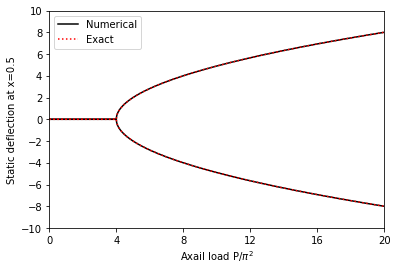

In [9]:
plt.plot(x,deflection_above,color='black',label='Numerical',linestyle="-")
plt.plot(x,deflection_below,color='black',linestyle="-")
plt.plot(x,exact_solution_1.real,color='red',label='Exact',linestyle='dotted')
plt.plot(x,exact_solution_2.real,color='red',linestyle='dotted')
plt.xlim([0, 20])
plt.ylim([-10, 10])
plt.xticks([0, 4, 8, 12, 16, 20])
plt.yticks([-10,-8,-6,-4,-2,0, 2, 4,6,8,10])
plt.xlabel("Axail load P/$\pi^2$")
plt.ylabel("Static deflection at x=0.5")
plt.legend()

In [ ]:
len(gfsol.components[0].vec)
print(gfsol.components[0].vec)

In [ ]:
a = BilinearForm(fesm)
a += (grad(sigma)*grad(v) - p*grad(w)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda)*dx

gfsol = GridFunction(fesm)
gfsol.components[0].Set(sin(x))
solvers.Newton(a,gfsol,inverse="sparsecholesky")

In [ ]:
gfw, gfsigma, gfmu = gfsol.components

In [ ]:
print(gfw.vec)